<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=6 color=#F32500>
        <div  align=center>
            تمرین هفته هشتم بوت کمپ یادگیری ماشین-
            مپصا
        </div>
        <br/>
    </font>
</div>

<div id="bayes" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=4>
		 سوال یک:‌ هدف از این سوال آشنایی با الگوریتم K نزدیکترین همسایه براي مسایل دسته بندي میباشد.
		مجموعه داده را از لینک زیر دانلود کنید و به سوالات پاسخ دهید.
		</br>
		</br>
</div>
		https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data

 <div id="bayes" style="direction:rtl;line-height:300%; padding-right: 200px;">
	<font face="XB Zar" size=4>
 الف- الگوریتم K نزدیکترین همسایه را با استفاده از معیار فاصله اقلیدسی پیاده سازي نمایید. در این پیاده سازي
از تمامی ویژگیهاي این مجموعه داده که شامل 13 ویژگی است، استفاده نمایید. این مجموعه داده شامل 303 شخص  میباشد که به دو کلاس بیمار و سالم تقسیم شدهاند. مقادیر 1 تا 7، 10 و 15 را براي این الگوریتم استفاده نمایید و بهترین
مقدار K را بدست آورید. لازم به ذکر است که در این بخش دادهها را به دو بخش یادگیري و آزمون با نسبت 2 به 1 تقسیم کنید. در نهایت دقت الگوریتم و ماتریس پریشانی را براي مجموعه داده آموزش و آزمون گزارش نمایید.
		</br>
		</br>
</div>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("processed.cleveland.data")
data.columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']


In [15]:
from sklearn.model_selection import train_test_split

In [158]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


In [11]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [95]:
data.drop(data.loc[data['ca']=='?'].index,inplace=True)
data.drop(data.loc[data['thal']=='?'].index,inplace=True)

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 300
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       296 non-null    float64
 1   sex       296 non-null    float64
 2   cp        296 non-null    float64
 3   trestbps  296 non-null    float64
 4   chol      296 non-null    float64
 5   fbs       296 non-null    float64
 6   restecg   296 non-null    float64
 7   thalach   296 non-null    float64
 8   exang     296 non-null    float64
 9   oldpeak   296 non-null    float64
 10  slope     296 non-null    float64
 11  ca        296 non-null    object 
 12  thal      296 non-null    object 
 13  num       296 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 34.7+ KB


In [111]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [115]:
x_train, x_test, y_train, Y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [166]:
def find_best_neighbors2(k,x_train,y_train): 
    pipe=make_pipeline(StandardScaler(),KNeighborsClassifier(n_neighbors=k))
   
    
    neigh=pipe.fit(x_train,y_train)
    y_predict=neigh.predict(x_train)
    
    print(confusion_matrix(y_train, y_predict))
    

In [167]:
for k in [1,2,3,5,7]:
    find_best_neighbors2(k,x_train,y_train)

[[104   0   0   0   0]
 [  0  37   0   0   0]
 [  0   0  25   0   0]
 [  0   0   0  22   0]
 [  0   0   0   0  10]]
[[104   0   0   0   0]
 [ 17  20   0   0   0]
 [  6   8  11   0   0]
 [  6   4   4   8   0]
 [  1   3   2   4   0]]
[[98  4  1  1  0]
 [14 19  2  2  0]
 [10  6  8  1  0]
 [ 8  4  5  5  0]
 [ 2  4  2  0  2]]
[[99  5  0  0  0]
 [17 16  2  2  0]
 [ 5 12  6  2  0]
 [ 4  7  6  4  1]
 [ 1  2  4  3  0]]
[[101   3   0   0   0]
 [ 19  15   2   1   0]
 [  6  11   7   1   0]
 [  6   8   4   3   1]
 [  1   2   6   1   0]]


k=2

In [169]:
pipe=make_pipeline(StandardScaler(),KNeighborsClassifier(n_neighbors=2))
   
   
neigh=pipe.fit(x_train,y_train)

Y_predict=neigh.predict(x_test)


In [170]:
print(confusion_matrix(Y_test, Y_predict))

[[49  5  0  1  0]
 [10  5  2  0  0]
 [ 1  3  4  2  0]
 [ 4  5  4  0  0]
 [ 0  0  1  2  0]]


In [171]:
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.77      0.89      0.82        55
           1       0.28      0.29      0.29        17
           2       0.36      0.40      0.38        10
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00         3

    accuracy                           0.59        98
   macro avg       0.28      0.32      0.30        98
weighted avg       0.51      0.59      0.55        98



/Users/arianzarifian/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/arianzarifian/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/arianzarifian/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

 <div id="bayes" style="direction:rtl;line-height:300%; padding-right: 200px;">
	<font face="XB Zar" size=4>
    ب- قسمت الف را فقط براي بهترین مقدار K ولی بدون نرمالسازي ویژگیها انجام دهید و نتیجه بهدستآمده را با
قسمت قبلی مقایسه نمایید. به صورت کلی استفاده از نرمالسازي چه تاثیري بر روي دستهبندي میتواند داشته باشد؟
 توضیح دهید.
</div>


In [113]:
def find_best_neighbors1(k,x_train,y_train): 
   
    neigh=KNeighborsClassifier(n_neighbors=k)
    neigh.fit(x_train,y_train)
    y_predict=neigh.predict(x_train)
    print( y_predict.shape)
    print(confusion_matrix(y_train, y_predict))


In [ ]:
for k in [1,2,3,5,7]:
    find_best_neighbors1(k,x_train,y_train)

In [116]:
for k in [1,2,3,5,7]:
    find_best_neighbors1(k,x_train,y_train)

(198,)
[[104   0   0   0   0]
 [  0  37   0   0   0]
 [  0   0  25   0   0]
 [  0   0   0  22   0]
 [  0   0   0   0  10]]
(198,)
[[104   0   0   0   0]
 [ 20  17   0   0   0]
 [  9  10   6   0   0]
 [  8   6   3   5   0]
 [  3   3   2   0   2]]
(198,)
[[100   3   1   0   0]
 [ 21  12   3   0   1]
 [ 15   2   8   0   0]
 [ 11   5   0   5   1]
 [  5   2   0   0   3]]
(198,)
[[93  7  2  1  1]
 [21 15  0  1  0]
 [14  7  4  0  0]
 [12  5  2  2  1]
 [ 6  2  0  0  2]]
(198,)
[[97  4  0  2  1]
 [24  8  4  1  0]
 [14  7  3  1  0]
 [13  4  2  3  0]
 [ 7  1  0  1  1]]


In [136]:
for k in [1,2,3,5,7]:
    find_best_neighbors1(k,x_train,y_train)

(198,)
[[104   0   0   0   0]
 [  0  37   0   0   0]
 [  0   0  25   0   0]
 [  0   0   0  22   0]
 [  0   0   0   0  10]]
(198,)
[[104   0   0   0   0]
 [ 20  17   0   0   0]
 [  9  10   6   0   0]
 [  8   6   3   5   0]
 [  3   3   2   0   2]]
(198,)
[[100   3   1   0   0]
 [ 21  12   3   0   1]
 [ 15   2   8   0   0]
 [ 11   5   0   5   1]
 [  5   2   0   0   3]]
(198,)
[[93  7  2  1  1]
 [21 15  0  1  0]
 [14  7  4  0  0]
 [12  5  2  2  1]
 [ 6  2  0  0  2]]
(198,)
[[97  4  0  2  1]
 [24  8  4  1  0]
 [14  7  3  1  0]
 [13  4  2  3  0]
 [ 7  1  0  1  1]]


k=2

In [154]:
neigh=KNeighborsClassifier(n_neighbors=2)
Y_predict=neigh.fit(x_train,y_train).predict(x_test)

In [155]:
print(confusion_matrix(Y_test, Y_predict))

[[45  8  0  2  0]
 [12  4  0  1  0]
 [ 1  7  2  0  0]
 [ 8  3  2  0  0]
 [ 2  1  0  0  0]]


In [172]:
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.77      0.89      0.82        55
           1       0.28      0.29      0.29        17
           2       0.36      0.40      0.38        10
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00         3

    accuracy                           0.59        98
   macro avg       0.28      0.32      0.30        98
weighted avg       0.51      0.59      0.55        98



/Users/arianzarifian/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/arianzarifian/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/arianzarifian/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

<div id="bayes" style="direction:rtl;line-height:300%; padding-right: 200px;">
	<font face="XB Zar" size=4>
ج- قسمت الف را بار دیگر با معیارهاي فاصله زیر انجام دهید.
</br>
1. Manhattan 2. Chebyshev
</div>

In [173]:
pipe=make_pipeline(StandardScaler(),KNeighborsClassifier(n_neighbors=2,metric='chebyshev'))
   
neigh=pipe.fit(x_train,y_train)

Y_predict=neigh.predict(x_test)


In [174]:
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.70      0.87      0.77        55
           1       0.29      0.29      0.29        17
           2       0.30      0.30      0.30        10
           3       0.50      0.08      0.13        13
           4       0.00      0.00      0.00         3

    accuracy                           0.58        98
   macro avg       0.36      0.31      0.30        98
weighted avg       0.54      0.58      0.53        98



/Users/arianzarifian/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/arianzarifian/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/arianzarifian/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [176]:
pipe=make_pipeline(StandardScaler(),KNeighborsClassifier(n_neighbors=2,p=1))
   
neigh=pipe.fit(x_train,y_train)

Y_predict=neigh.predict(x_test)


In [177]:
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83        55
           1       0.24      0.24      0.24        17
           2       0.27      0.40      0.32        10
           3       0.33      0.08      0.12        13
           4       0.00      0.00      0.00         3

    accuracy                           0.59        98
   macro avg       0.32      0.32      0.30        98
weighted avg       0.55      0.59      0.56        98



/Users/arianzarifian/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/arianzarifian/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/arianzarifian/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

<div id="bayes" style="direction:rtl;line-height:300%; padding-right: 200px;">
	<font face="XB Zar" size=4>

سوال دو: در این تمرین از الگوریتم K نزدیکترین همسایه براي رگرسیون استفاده نمایید. مجموعه داده regression که در کنار
این فایل قرار داده شده است را به دو بخش آموزش و آزمون با نسبت 2 به 1 تقسیم نمایید. سپس بهترین مقدار K را با  آزمون خطا بهدست آورید. خطاي MSE را براي این مدل براي هر دو مجموعه داده آزمون و آموزش گزارش کنید. مجموعه داده آموزش و آزمون را با رنگهاي متفاوت در نموداري نمایش دهید.
</div>

In [14]:
df2=pd.read_csv('regression.txt')
X=df2.x
Y=df2.y

In [16]:
X_train, X_test, Y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [17]:
X_train.shape

(160,)

In [18]:
X_train=np.array(X_train)
X_train=X_train.reshape(-1,1)
X_test=np.array(X_test)
X_test=X_test.reshape(-1,1)


In [ ]:
def find_best_neighbors(k,X_train,Y_train): 
   
    train_sizes,train_scores,valid_scores=learning_curve(KNeighborsRegressor(n_neighbors=k),X_train,Y_train,train_sizes=[0.3,0.6,1], cv=5,scoring="neg_mean_squared_error")
    
    train_errors=-train_scores.mean(axis=1)
    valid_errors=-valid_scores.mean(axis=1)
    plt.title('K=%s'%k)
    
    plt.plot(train_sizes, train_errors, "r-+", linewidth=2,label="train")
    plt.plot(train_sizes, valid_errors, "b-", linewidth=3,label="valid")
    plt.legend()
    plt.xlabel('Training set size')
    plt.show()


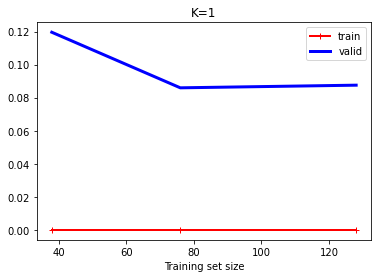

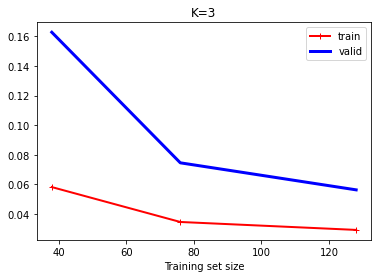

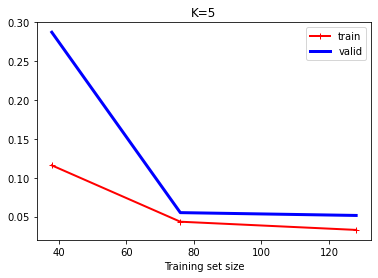

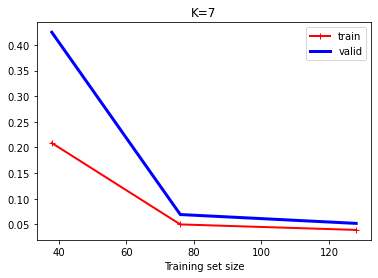

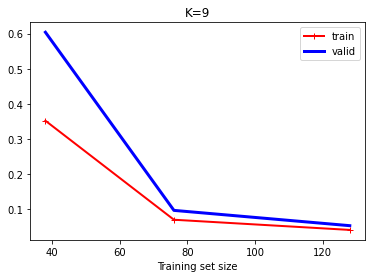

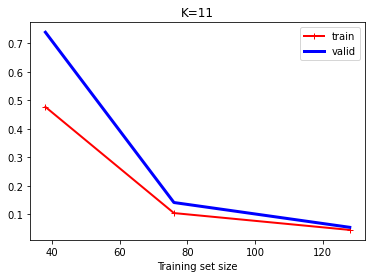

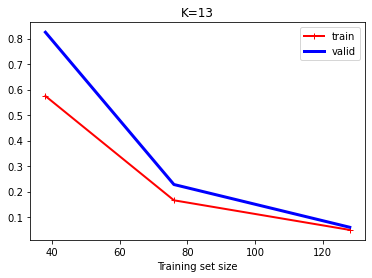

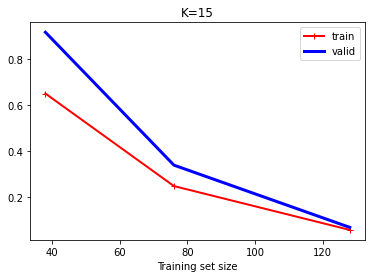

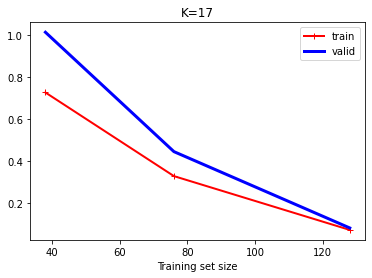

In [33]:
for k in [1,3,5,7,9,11,13,15,17]:
    find_best_neighbors(k,X_train,Y_train)

In [39]:
def MSE(k,X_train,Y_train):
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X_train,Y_train)
    Y_predict = neigh.predict(X_train)
    print(k, mean_squared_error(Y_train,Y_predict))

In [23]:
for k in [1,3,5,7,9,11,13,15,17]:
    MSE(k,X_train,Y_train)

1 0.0
3 0.027066103472222224
5 0.03237942325
7 0.036314229081632655
9 0.0379381087191358
11 0.04159238486570247
13 0.04227646013313609
15 0.04562966138888888
17 0.05038440320069204


train data

K=5

In [24]:
neigh=KNeighborsRegressor(n_neighbors=5)
Y_predict=neigh.fit(X_train,Y_train).predict(X_train)




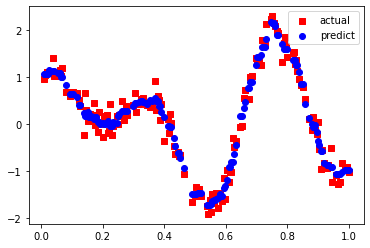

In [25]:
plt.scatter(X_train,Y_train,c='red',marker='s',label='actual')
plt.scatter(X_train,Y_predict,c='blue',label='predict')
plt.legend()
plt.show()

test data

In [26]:
_Y_predict=neigh.predict(X_test)

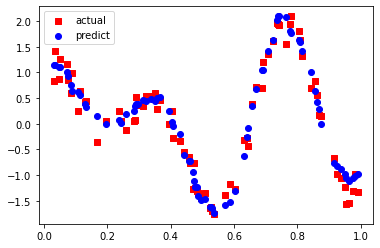

In [27]:
plt.scatter(X_test,y_test,c='red',marker='s',label='actual')
plt.scatter(X_test,_Y_predict,c='blue',label='predict')
plt.legend()
plt.show()

In [28]:
mean_squared_error(y_test,_Y_predict)

0.045522595